In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [151]:
df = pd.read_csv('/home/smayan/Desktop/DJS-compute-tasks/DJS-compute-tasks/Task 2/Data/lin-reg-from-scratch.csv')

In [152]:
df.shape

(10000, 4)

In [185]:
df.info

<bound method DataFrame.info of       Avg_hours_studied  last_exam_Score  percentage_result
0              0.777778         1.000000               0.91
1              0.444444         0.828283               0.65
2              0.888889         0.515152               0.45
3              0.555556         0.525253               0.36
4              0.777778         0.757576               0.66
...                 ...              ...                ...
9995           0.111111         0.494949               0.23
9996           0.777778         0.646465               0.58
9997           0.666667         0.838384               0.74
9998           1.000000         0.979798               0.95
9999           0.777778         0.747475               0.64

[10000 rows x 3 columns]>

In [153]:
df.head(4)

,Avg_hours_studied,last_exam_Score,hours_slept_before_exam,percentage_result
0,7,99,9,91
1,4,82,4,65
2,8,51,7,45
3,5,52,5,36


In [154]:
df.isnull().sum()

Avg_hours_studied          0
last_exam_Score            0
hours_slept_before_exam    0
percentage_result          0
dtype: int64

In [159]:
df.dtypes

Avg_hours_studied          int64
last_exam_Score            int64
hours_slept_before_exam    int64
percentage_result          int64
dtype: object

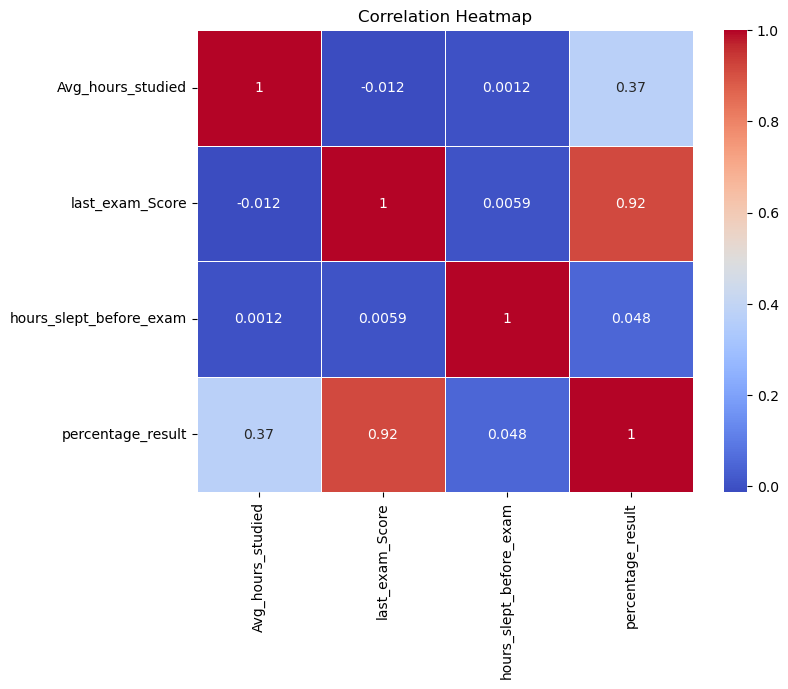

In [160]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


* **It is seen that other than hours_slept_before_exam all values strongly affect percentage_result, so in later model fitting hours_slept_before_exam is not used.**

Text(0, 0.5, 'Percentage')

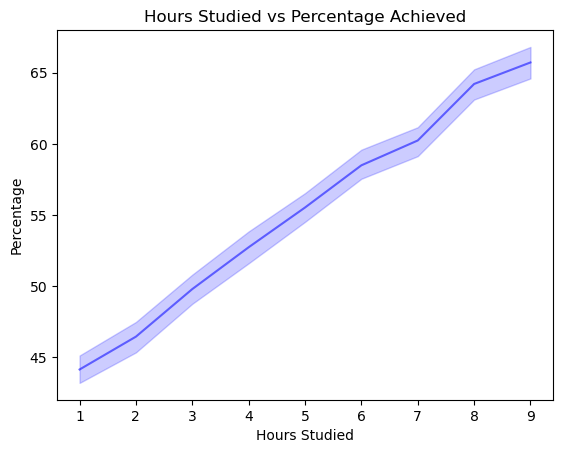

In [161]:
sns.lineplot(data = df, x = 'Avg_hours_studied',y = 'percentage_result',c = 'b',alpha = 0.55)
plt.title('Hours Studied vs Percentage Achieved')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage')

* **It is seen that percentage steadily increases and the number of hours of studying per day increases.**

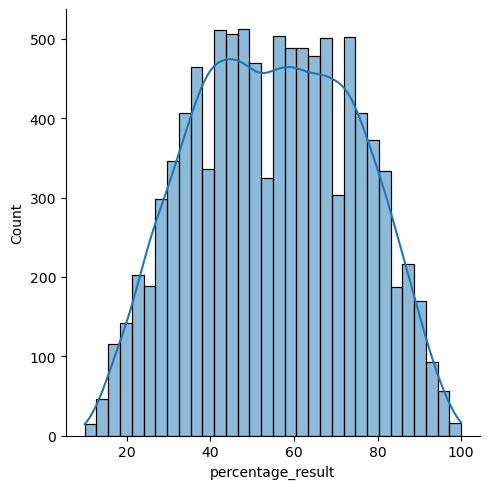

In [162]:
sns.displot(df['percentage_result'], kde = True)

* **Here it is seen that the data is normally distributed.**

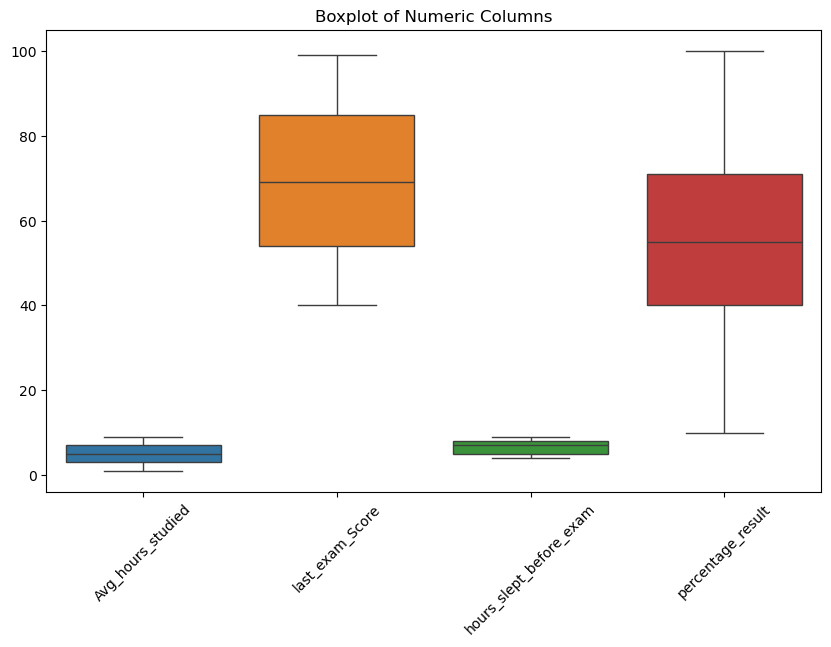

In [163]:

numeric_columns = df.select_dtypes(include=[float, int]).columns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Columns')
plt.show()


* **It is observed that there are no outliers in the data.**

In [164]:
df.describe()

,Avg_hours_studied,last_exam_Score,hours_slept_before_exam,percentage_result
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,55.224800
std,2.589309,17.343152,1.695863,19.212558
min,1.000000,40.000000,4.000000,10.000000
25%,3.000000,54.000000,5.000000,40.000000
50%,5.000000,69.000000,7.000000,55.000000
75%,7.000000,85.000000,8.000000,71.000000
max,9.000000,99.000000,9.000000,100.000000


In [165]:
df['percentage_result'] = df['percentage_result']/100.000000
df['Avg_hours_studied'] = df['Avg_hours_studied']/9.000000
df['last_exam_Score'] = df['last_exam_Score']/99.000000
# df['hours_slept_before_exam'] = df['hours_slept_before_exam']/9.000000
df.head(5)

,Avg_hours_studied,last_exam_Score,hours_slept_before_exam,percentage_result
0,0.777778,1.000000,9,0.91
1,0.444444,0.828283,4,0.65
2,0.888889,0.515152,7,0.45
3,0.555556,0.525253,5,0.36
4,0.777778,0.757576,8,0.66


* **Values are scaled by min-max scaling to have more balanced and equally spread out data.**

In [166]:
df.drop(columns=['hours_slept_before_exam'],axis=1, inplace=True)

* **Dropped as it has very less effect on target value.**

In [167]:
X_df = df.drop(columns = ['percentage_result'], axis=1)
X=X_df.to_numpy()
y = np.array(df['percentage_result'])
m = len(X)
X

array([[0.77777778, 1.        ],
       [0.44444444, 0.82828283],
       [0.88888889, 0.51515152],
       ...,
       [0.66666667, 0.83838384],
       [1.        , 0.97979798],
       [0.77777778, 0.74747475]])

In [168]:
print(f"X Shape: {X.shape}")
print(X)
print(f"y Shape: {y.shape}")
print(y)

X Shape: (10000, 2)
[[0.77777778 1.        ]
 [0.44444444 0.82828283]
 [0.88888889 0.51515152]
 ...
 [0.66666667 0.83838384]
 [1.         0.97979798]
 [0.77777778 0.74747475]]
y Shape: (10000,)
[0.91 0.65 0.45 ... 0.74 0.95 0.64]


In [169]:
b_init = 0.75181083
w_init = np.array([0.39, 0.187533])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (2,), b_init type: <class 'float'>


* **For trial prediction.**

In [170]:
def predict(x, w, b): 
    p = np.dot(x, w) + b     
    return p  

In [171]:
x_vec = X[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (2,), x_vec value: [0.77777778 1.        ]
f_wb shape (), prediction: 1.2426771633333333


In [172]:
df['percentage_result']

0       0.91
1       0.65
2       0.45
3       0.36
4       0.66
        ... 
9995    0.23
9996    0.58
9997    0.74
9998    0.95
9999    0.64
Name: percentage_result, Length: 10000, dtype: float64

In [173]:
def compute_cost(X, y, w, b): 
    m = len(X)
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b          
        cost = cost + (f_wb_i - y[i])**2       
    cost = cost / (2 * m)                        
    return cost

* **For computing cost using the formula:**
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
**where:**
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$

In [174]:
cost = compute_cost(X, y, w_init, b_init)
print(f'Cost at given w : {cost}')

Cost at given w : 0.161272880016018


In [175]:
def compute_gradient(X, y, w, b): 
    m,n = X.shape          
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i][j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

**Computing the gradients of w and b using the following formulae respectively :** 
$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$

In [176]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X, y, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 0.5474709255363646
dj_dw at initial w,b: 
 [0.31522355 0.35874689]


* **Trial run.**

In [177]:
import math
import copy
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    J_history = []
    w = w_in 
    b = b_in
    
    for i in range(num_iters):
        dj_db,dj_dw = gradient_function(X, y, w, b)  

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
    
        if i<5000:      
            J_history.append(cost_function(X, y, w, b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

**Performing gradient descent using the following logic:**

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [178]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
w, b, J_Hist = gradient_descent(X, y, initial_w, initial_b,compute_cost, compute_gradient,0.001, 1200)
print(f"Final values of b,w after Gradient Descent: {b:0.5f},{w} ")

Iteration    0: Cost     0.17   


Iteration  120: Cost     0.11   
Iteration  240: Cost     0.08   
Iteration  360: Cost     0.05   
Iteration  480: Cost     0.04   
Iteration  600: Cost     0.03   
Iteration  720: Cost     0.02   
Iteration  840: Cost     0.02   
Iteration  960: Cost     0.01   
Iteration 1080: Cost     0.01   
b,w found by gradient descent: 0.26111,[0.15916746 0.21502017] 


In [179]:
w

array([0.15916746, 0.21502017])

In [180]:
b

0.26110717183594806

In [181]:
y_pred = predict(X,w,b)

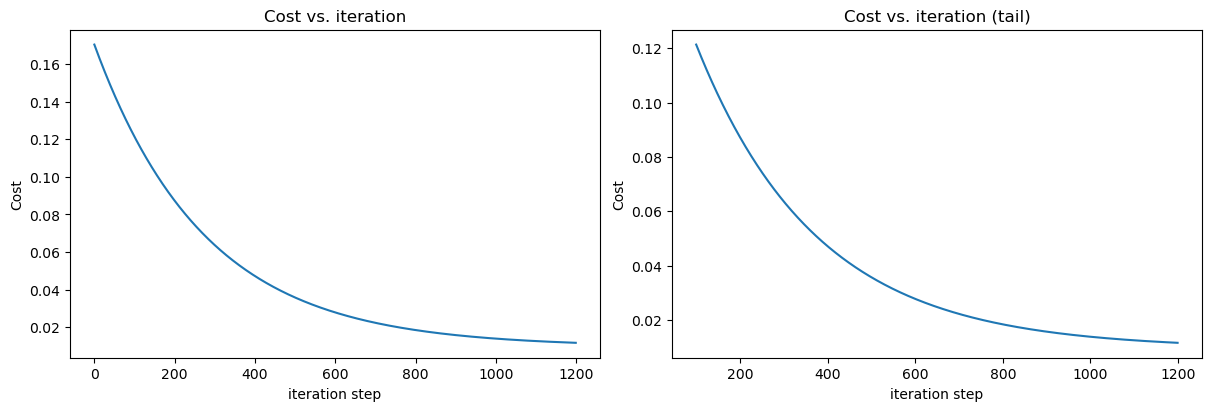

In [182]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_Hist)
ax2.plot(100 + np.arange(len(J_Hist[100:])), J_Hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

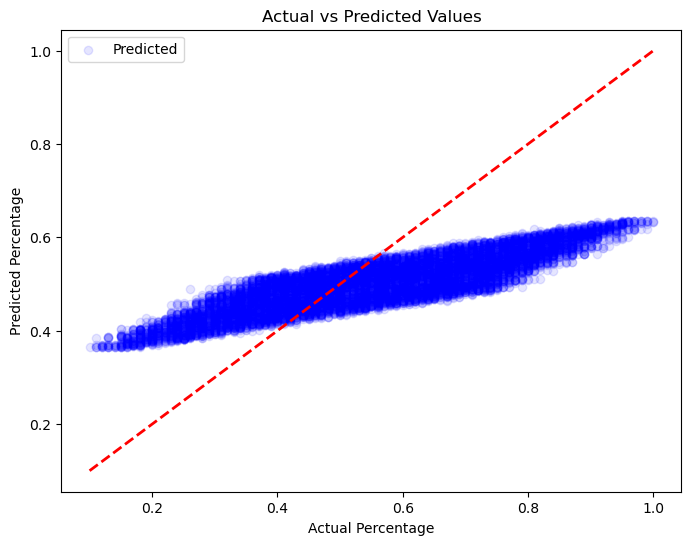

In [183]:
# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, c='blue', alpha=0.1, label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='green', linestyle='--', linewidth=2)
plt.xlabel('Actual Percentage')
plt.ylabel('Predicted Percentage')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


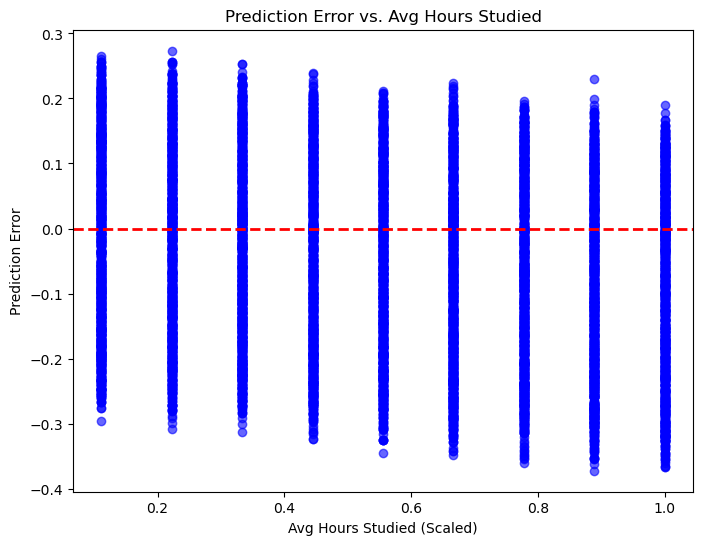

In [184]:
# Prediction error plot
error = y_pred - y
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], error, c='blue', alpha=0.6)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Avg Hours Studied (Scaled)')
plt.ylabel('Prediction Error')
plt.title('Prediction Error vs. Avg Hours Studied')
plt.show()
